# Geometric Brownian Motion

This model is described for modeling the options´s underlying price as a geometric Browninan motion like this:

$dS = \mu S dt + \sigma S dW$

where $W_t$ is the Brownian motion whose characteristic, being $Z \sim N(0,1)$, is:

$dW \sim N(0,\sqrt{dt}) \sim N(0,1) \sqrt{dt} \sim Z \sqrt{dt} $

thus the differential of $W_i$ is distributed like:

$dW_i = Z_i \sqrt{dt}$

and the sum of $W_i$ differencials is equal to:

$W_t = \sum_{i=0}^{t} dW_i$

Resolving the SPDE (Stochastic Partial Differential Equation) we get:

$S(t) = S_0 e^{(\mu + \frac{1}{2}\sigma^2)t + \sigma W_t}$

This is one way to build simulations of option´s underlying asset.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def geometric_brownian_motion(S0, mu, sigma, T, n_sim):
    """
    Function to simulate Geometric Bronian Motion Prices
    """
    dt = 1 / T
    Z = np.random.standard_normal(size=(n_sim,T))
    dw = Z * np.sqrt(dt)
    W = np.cumsum(dw, axis=1)
    
    St = S0 * np.exp((mu-0.5*sigma**2)*np.array(range(1,T+1)) + sigma*W)
    St = np.hstack((np.transpose([[S0]*n_sim]), St))
    return St

Setting the Numpy random seed as 101, to get always the same result...

In [3]:
np.random.seed(101)

In [4]:
NUM_SIMULATIONS = 1000
mu = 0.01 # return (Year)
sigma = 0.07 # volatility (Year)
T = 365
S_0 = 13500

St = geometric_brownian_motion(S0=S_0, mu=mu/T, sigma=sigma*(1/np.sqrt(T)), T=T, n_sim=NUM_SIMULATIONS)

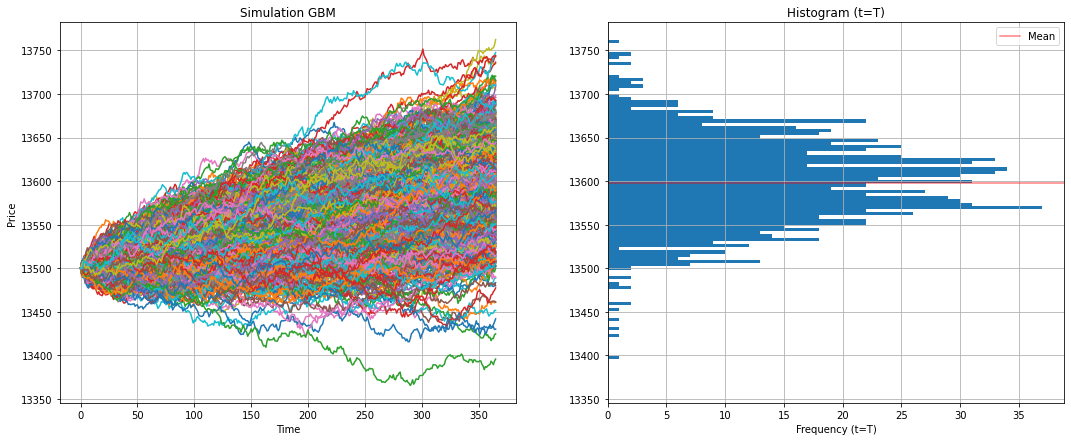

In [5]:
plt.figure(figsize=(18,7))

ax_1 = plt.subplot(1,2,1)
ax_1.plot(St.T)
ax_1.set_title('Simulation GBM')
ax_1.set_xlabel('Time')
ax_1.set_ylabel('Price')
ax_1.grid()

ax_2 = plt.subplot(1,2,2)
ax_2.hist(St[:,-1], orientation='horizontal', bins=int(NUM_SIMULATIONS/10))
ax_2.axhline(St[:,-1].mean(), color='r', label='Mean', alpha=0.5)
ax_2.set_ylim(ax_1.get_ylim())
ax_2.set_title('Histogram (t=T)')
ax_2.set_xlabel('Frequency (t=T)')
ax_2.legend()
ax_2.grid()

plt.show()

<hr>

This could not to be the final version, so if you have some recommendation or comment about this, I will be grateful to hear it, using e-mail <b>craquinterogo@unal.edu.co</b> or <b>cristian.quintero@est.uexternado.edu.co</b>